In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

import re
from textblob import TextBlob

from nltk.stem import PorterStemmer

from tqdm import tqdm
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split

In [2]:
data1 = pd.read_csv("Datasets of Stocks Market and Stock News Articles\Datasets of Stocks Market and Stock News Articles\Stocks News Articles Datasets\Headlines_2015.csv")
data2 = pd.read_csv("Datasets of Stocks Market and Stock News Articles\Datasets of Stocks Market and Stock News Articles\Stocks News Articles Datasets\Headlines_2016.csv")
data3 = pd.read_csv("Datasets of Stocks Market and Stock News Articles\Datasets of Stocks Market and Stock News Articles\Stocks News Articles Datasets\Headlines_2017.csv")
data4 = pd.read_csv("Datasets of Stocks Market and Stock News Articles\Datasets of Stocks Market and Stock News Articles\Stocks News Articles Datasets\Headlines_2018.csv")
data5 = pd.read_csv("Datasets of Stocks Market and Stock News Articles\Datasets of Stocks Market and Stock News Articles\Stocks News Articles Datasets\Headlines_2019.csv")
data6 = pd.read_csv("Datasets of Stocks Market and Stock News Articles\Datasets of Stocks Market and Stock News Articles\Stocks News Articles Datasets\Headlines_2020.csv")
data7 = pd.read_csv("Datasets of Stocks Market and Stock News Articles\Datasets of Stocks Market and Stock News Articles\Stocks News Articles Datasets\Headlines_2021.csv")

df = pd.concat([data1, data2, data3, data4, data5, data6, data7])
print(len(data1), len(data2), len(data3),len(data4), len(data5), len(data6),len(data7))
print("Total Rows in dataframe:", len(df))

365 366 365 365 364 366 174
Total Rows in dataframe: 2365


In [3]:
df.head()
print("="*50)

df = df.drop_duplicates()

df['Date'] = pd.to_datetime(df['Date'])
print(df.describe())
print("="*50)
df.info()
print("="*50)
print(df.shape)
print("="*50)
print(df.isnull())

                       Date                                          Headlines
count                  2342                                               2342
unique                 2335                                               2332
top     2019-11-20 00:00:00  MasterCard is expanding its mobile wallet in S...
freq                      2                                                  3
first   2015-01-01 00:00:00                                                NaN
last    2021-06-23 00:00:00                                                NaN
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2342 entries, 0 to 173
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2342 non-null   datetime64[ns]
 1   Headlines  2342 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 54.9+ KB
(2342, 2)
      Date  Headlines
0    False      False
1    False      False
2    False      Fa

C:\Users\TIRTHA~1\AppData\Local\Temp/ipykernel_10008/3691795878.py:7: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df.describe())


In [4]:
#Create a function to get subjectivity

def getSubjectivity(df):
    return TextBlob(df).sentiment.subjectivity

#create a function to get the polarity

def getPolarity(df):
    return TextBlob(df).sentiment.polarity

#create two new solumns called "Subjectivity" & "Polarity"

df['Subjectivity'] = df['Headlines'].apply(getSubjectivity)
df['Polarity'] = df['Headlines'].apply(getPolarity)

#show the data"
df.head()

,Date,Headlines,Subjectivity,Polarity
0,2015-01-01,What Can We Expect From Apple Inc. In 2015? 1 ...,0.621789,0.166775
1,2015-01-02,What to expect from Apple in 2015 beyond its s...,0.539970,0.144614
2,2015-01-03,Mountie: An inexpensive and innovative way to ...,0.593317,0.202787
3,2015-01-04,"Donald Yacktman on the Sources of Moats, His C...",0.504270,0.150826
4,2015-01-05,"SIM-free iPhone 6, 6 Plus reportedly debuting ...",0.442675,0.144078


In [5]:
#create a function o get the text sentiment

def getSentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'Positve'

In [6]:
#create a column to store the text sentiments

df['Sentiment'] = df['Polarity'].apply(getSentiment)

#show the data
df.head()

,Date,Headlines,Subjectivity,Polarity,Sentiment
0,2015-01-01,What Can We Expect From Apple Inc. In 2015? 1 ...,0.621789,0.166775,Positve
1,2015-01-02,What to expect from Apple in 2015 beyond its s...,0.539970,0.144614,Positve
2,2015-01-03,Mountie: An inexpensive and innovative way to ...,0.593317,0.202787,Positve
3,2015-01-04,"Donald Yacktman on the Sources of Moats, His C...",0.504270,0.150826,Positve
4,2015-01-05,"SIM-free iPhone 6, 6 Plus reportedly debuting ...",0.442675,0.144078,Positve


In [7]:
df.Sentiment.value_counts()

Positve     2181
Negative     131
neutral       30
Name: Sentiment, dtype: int64

<AxesSubplot:title={'center':'Sentiment Analysis'}, xlabel='Sentiment', ylabel='Counts'>

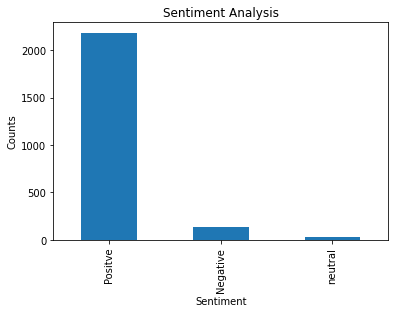

In [8]:
df['Sentiment'].value_counts()

#plot & visualize the counts

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Sentiment'].value_counts().plot(kind='bar')

In [9]:
#We also want sentiment column to be numerical so we will use Label Encoder 
from sklearn.preprocessing import LabelEncoder
ayn = LabelEncoder()
df['Sentiment'] = ayn.fit_transform(df['Sentiment'])
df

,Date,Headlines,Subjectivity,Polarity,Sentiment
0,2015-01-01,What Can We Expect From Apple Inc. In 2015? 1 ...,0.621789,0.166775,1
1,2015-01-02,What to expect from Apple in 2015 beyond its s...,0.539970,0.144614,1
2,2015-01-03,Mountie: An inexpensive and innovative way to ...,0.593317,0.202787,1
3,2015-01-04,"Donald Yacktman on the Sources of Moats, His C...",0.504270,0.150826,1
4,2015-01-05,"SIM-free iPhone 6, 6 Plus reportedly debuting ...",0.442675,0.144078,1
...,...,...,...,...,...
169,2021-06-19,Best pre-Prime Day smartwatch deals on Apple W...,0.387974,0.198459,1
170,2021-06-20,iPhone 13 rumors: As Apple's fall event gets c...,0.363249,0.443894,1
171,2021-06-21,Apple is shortening new free TV Plus trials fr...,0.380244,0.319115,1
172,2021-06-22,Google likely to soon face antitrust claims ov...,0.493334,0.346898,1


In [10]:
data = df[['Headlines', 'Sentiment']]

In [11]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [12]:
from nltk.corpus import stopwords
ps = PorterStemmer()

preprocessed_headlines = []
# tqdm is for printing the status bar
for sentance in tqdm(df['Headlines'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = sentance.lower()
    sentance = [ps.stem(token) for token in nltk.word_tokenize(sentance) if not token in stopwords.words('english')]
    sentance = ' '.join(sentance)
    preprocessed_headlines.append(sentance.strip())

100%|██████████████████████████████████████████████████████████████████████████████| 2342/2342 [05:24<00:00,  7.22it/s]


In [13]:
df['Headlines']=pd.DataFrame(preprocessed_headlines)


In [14]:
df.head(5)

,Date,Headlines,Subjectivity,Polarity,Sentiment
0,2015-01-01,expect appl inc reason might wrong appl inc re...,0.621789,0.166775,1
1,2015-01-02,expect appl beyond smartwatch amazon latest ki...,0.539970,0.144614,1
2,2015-01-03,mounti inexpens innov way attach iphon ipad ma...,0.593317,0.202787,1
3,2015-01-04,donald yacktman sourc moat concern appl strate...,0.504270,0.150826,1
4,2015-01-05,sim free iphon plu reportedli debut tomorrow l...,0.442675,0.144078,1


c:\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

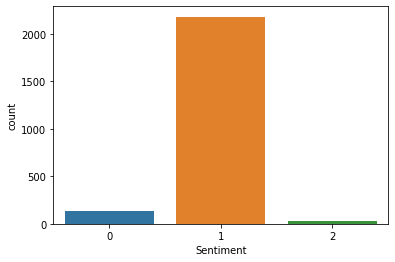

In [15]:
sns.countplot(df['Sentiment'])

<AxesSubplot:title={'center':'Sentiment Analysis'}, xlabel='Sentiment', ylabel='Counts'>

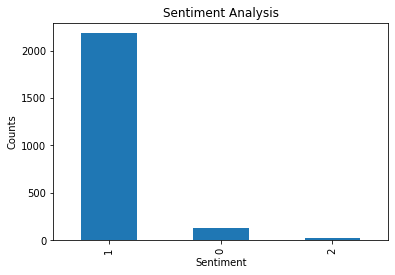

In [16]:
#for counting 
df['Sentiment'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
#for counting shown in the graph
df['Sentiment'].value_counts().plot(kind='bar')


In [17]:
X = data['Headlines']
y = data['Sentiment'] 

In [18]:
X_train_data, X_test_data, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
count_vector=CountVectorizer(stop_words="english")
count_vector.fit(X_train_data)
print(count_vector.get_feature_names()[0:20])
print(count_vector.get_feature_names()[-20:])
X_train=count_vector.transform(X_train_data)
X_test=count_vector.transform(X_test_data)

['00', '000', '000ppi', '000s', '001', '002', '003', '004', '006', '007', '008', '009', '01', '01012016', '011', '012', '013', '014', '015', '016']
['zs', 'zscaler', 'zte', 'zts', 'zu', 'zuber', 'zuck', 'zuckerberg', 'zuk', 'zulily', 'zumiez', 'zumz', 'zune', 'zuora', 'zurcher', 'zurich', 'zweig', 'zwj', 'zynerba', 'zynga']


In [25]:
import pickle

pickle.dump(count_vector, open('count_vector.pkl', 'wb'))

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score
from mlxtend.plotting import plot_decision_regions
from sklearn.feature_extraction.text import CountVectorizer


In [21]:
count_vector.get_feature_names()[:10]

['00', '000', '000ppi', '000s', '001', '002', '003', '004', '006', '007']

In [22]:
print(y_train)
print("=="*50)
print(X_train)
print("=="*50)
X_train.shape[0]
print("=="*50)
X_test.shape[0]
print("=="*50)
df.shape[0]
print("=="*50)


152    0
157    1
47     1
120    1
2      1
      ..
177    1
364    1
34     1
198    1
129    1
Name: Sentiment, Length: 1873, dtype: int32
  (0, 1)	4
  (0, 21)	1
  (0, 32)	1
  (0, 80)	1
  (0, 101)	4
  (0, 102)	1
  (0, 143)	2
  (0, 166)	2
  (0, 237)	1
  (0, 383)	1
  (0, 608)	1
  (0, 699)	1
  (0, 784)	2
  (0, 833)	1
  (0, 1033)	1
  (0, 1264)	1
  (0, 1325)	1
  (0, 1543)	1
  (0, 1731)	2
  (0, 1734)	27
  (0, 1823)	2
  (0, 1866)	1
  (0, 1934)	2
  (0, 1936)	1
  (0, 2013)	1
  :	:
  (1872, 29119)	1
  (1872, 29206)	1
  (1872, 29226)	1
  (1872, 29237)	2
  (1872, 29299)	2
  (1872, 29351)	1
  (1872, 29386)	3
  (1872, 29666)	1
  (1872, 29691)	1
  (1872, 29759)	1
  (1872, 29777)	1
  (1872, 29783)	1
  (1872, 29846)	2
  (1872, 29943)	3
  (1872, 29956)	2
  (1872, 29965)	2
  (1872, 29993)	1
  (1872, 30061)	1
  (1872, 30095)	1
  (1872, 30166)	2
  (1872, 30197)	1
  (1872, 30210)	2
  (1872, 30286)	2
  (1872, 30367)	1
  (1872, 30407)	1


In [23]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

In [24]:
nb.fit(X_train, y_train)

MultinomialNB()

In [43]:
text=str(input())

(AAPL) Google To Bring iPad Pro-Style Split Screen on Android Tablets Apple Inc. (AAPL) Receives "AA-" Credit Rating from Morningstar Apple&quot;s Hedging Advantage Might 


In [50]:
from nltk.corpus import stopwords
ps = PorterStemmer()

preprocessed_headlines1 = []
# tqdm is for printing the status bar
for sentance in text:
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = sentance.lower()
    sentance = [ps.stem(token) for token in nltk.word_tokenize(sentance) if not token in stopwords.words('english')]
    sentance = ' '.join(sentance)
    preprocessed_headlines1.append(sentance.strip())

c:\python\python38\lib\site-packages\bs4\__init__.py:332: MarkupResemblesLocatorWarning: "." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [51]:
preprocessed_headlines1

['',
 '',
 '',
 'p',
 'l',
 '',
 '',
 'g',
 '',
 '',
 'g',
 'l',
 'e',
 '',
 '',
 '',
 '',
 'b',
 'r',
 '',
 'n',
 'g',
 '',
 '',
 'p',
 '',
 '',
 '',
 'p',
 'r',
 '',
 '',
 '',
 '',
 '',
 'l',
 'e',
 '',
 '',
 'p',
 'l',
 '',
 '',
 '',
 '',
 'c',
 'r',
 'e',
 'e',
 'n',
 '',
 '',
 'n',
 '',
 '',
 'n',
 '',
 'r',
 '',
 '',
 '',
 '',
 '',
 '',
 'b',
 'l',
 'e',
 '',
 '',
 '',
 '',
 'p',
 'p',
 'l',
 'e',
 '',
 '',
 'n',
 'c',
 '',
 '',
 '',
 '',
 '',
 'p',
 'l',
 '',
 '',
 'r',
 'e',
 'c',
 'e',
 '',
 'v',
 'e',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'c',
 'r',
 'e',
 '',
 '',
 '',
 '',
 'r',
 '',
 '',
 '',
 'n',
 'g',
 '',
 'f',
 'r',
 '',
 '',
 '',
 '',
 '',
 'r',
 'n',
 '',
 'n',
 'g',
 '',
 '',
 '',
 'r',
 '',
 '',
 'p',
 'p',
 'l',
 'e',
 '',
 'q',
 'u',
 '',
 '',
 '',
 '',
 '',
 'h',
 'e',
 '',
 'g',
 '',
 'n',
 'g',
 '',
 '',
 '',
 'v',
 '',
 'n',
 '',
 '',
 'g',
 'e',
 '',
 '',
 '',
 'g',
 'h',
 '',
 '']

In [49]:
df_new=pd.DataFrame(preprocessed_headlines1)
df_new

,0
0,
1,
2,
3,p
4,l
...,...
166,
167,g
168,h
169,


In [48]:
X=count_vector.transform([df_new])
predictions = nb.predict(X)

AttributeError: 'DataFrame' object has no attribute 'lower'

In [30]:
print(predictions)

[1]


In [35]:
import pickle

pickle.dump(nb, open('nb.pkl', 'wb'))

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test,predicton)*100